<a href="https://colab.research.google.com/github/NevroHelios/kaggle_p/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c spaceship-titanic

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 92.4MB/s]


In [ ]:
!unzip spaceship-titanic.zip

Archive:  spaceship-titanic.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# Data Loading

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport

<ipython-input-8-98f09099f855>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
report = ProfileReport(df, title='Spaceship Titanic')
report

In [ ]:
def splitCabin(x):
  if len(str(x).split('/')) == 3:
    return str(x).split('/')
  else:
    return ['Missing', 'Missing', 'Missing']

In [ ]:
# check is any row has any NaN values
df[df.isna().any(axis=1)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667,9250_01,Europa,False,E/597/P,TRAPPIST-1e,29.0,False,0.0,2972.0,NaN,28.0,188.0,Chain Reedectied,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True


In [ ]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [ ]:
def preProcessing(df):
  # fill missing values of 'HomePlanet'
  df['HomePlanet'].fillna('Missing', inplace=True)
  # cryosleep
  df['CryoSleep'].fillna('Missing', inplace=True)
  # split cabin into deck and side
  df['Deck'] = df['Cabin'].apply(lambda x : splitCabin(x)[0])
  df['Side'] = df['Cabin'].apply(lambda x : splitCabin(x)[2])
  df.drop('Cabin', axis=1, inplace=True)
  # destination - fill missing
  df['Destination'].fillna('Missing', inplace=True)
  # age
  df['Age'].fillna(df['Age'].mean(), inplace=True)

  #'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'
  df["RoomService"].fillna(0, inplace=True)
  df['FoodCourt'].fillna(0, inplace=True)
  df['ShoppingMall'].fillna(0, inplace=True)
  df['Spa'].fillna(0, inplace=True)
  df['VRDeck'].fillna(0, inplace=True)
  # VIP
  df['VIP'].fillna('Missing', inplace=True)
  # name - drop due to high cardinality
  df.drop('Name', axis=1, inplace=True)
  # drop the remaining
  # df.dropna(inplace=True)

In [ ]:
abt = df.copy()

In [ ]:
preProcessing(abt)

In [ ]:
abt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   object 
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   bool   
 12  Deck          8693 non-null   object 
 13  Side          8693 non-null   object 
dtypes: bool(2), float64(6), object(6)
memory usage: 832.1+ KB


# Modelling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# feature column
X = abt.drop(['Transported', 'PassengerId'], axis=1)
# One hot encode
X = pd.get_dummies(X)
# target column
y = abt['Transported']

In [ ]:
# train and testing partition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

<Axes: xlabel='Transported', ylabel='count'>

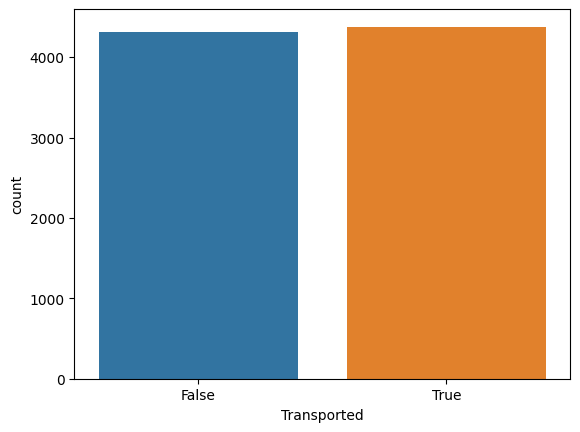

In [ ]:
sns.countplot(x='Transported', data=df)

# Setup Pipelines

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
pipelines = {
    'rf': make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1234)),
     'gb': make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1234))

}

In [ ]:
grid = {
    'rf': {
        'randomforestclassifier__n_estimators':[100, 200, 300]
    },
    'gb': {
        'gradientboostingclassifier__n_estimators':[100, 200, 300]
    }
}

In [ ]:
# dict to hold the models
fit_models = {}
# loop through the algos
for algo, pipeline in pipelines.items():
  print(f'Training the {algo} model')
  # creating a gridSearchCV class
  model = GridSearchCV(pipeline, grid[algo], n_jobs= -1, cv=15)
  # train the model
  model.fit(X_train, y_train)
  # store in dict
  fit_models[algo] = model

Training the rf model
Training the gb model


# Evaluate the performance

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
# evaluating the performance
for algo, model in fit_models.items():
  yhat = model.predict(X_test)
  accuracy = accuracy_score(y_test, yhat)
  precision = precision_score(y_test, yhat)
  recall = recall_score(y_test, yhat)
  print(f'Metrics for {algo}: accuracy- {accuracy}, recall- {recall}, precision- {precision}:')

Metrics for rf: accuracy- 0.7898773006134969, recall- 0.7592592592592593, precision- 0.8065573770491803:
Metrics for gb: accuracy- 0.8052147239263804, recall- 0.8387345679012346, precision- 0.7842712842712842:


# Save the Model

In [ ]:
import pickle

In [ ]:
with open('gradiantboosted.pkl', 'wb') as f:
  pickle.dump(fit_models['gb'], f)

In [ ]:
with open('gradiantboosted.pkl', 'rb') as f:
  reloaded_model = pickle.load(f)

# Predict on test-data

In [ ]:
# read the test data
test_df = pd.read_csv('test.csv')
# copy it
abt_test = test_df.copy()
# preprocessing
preProcessing(abt_test)
# one hot encode
abt_test = pd.get_dummies(abt_test.drop('PassengerId', axis=1))

In [ ]:
abt_test.shape

(4277, 32)

In [ ]:
X.shape

(8693, 32)

In [ ]:
yhat_test = fit_models['gb'].predict(abt_test)

In [ ]:
submission = pd.DataFrame([test_df['PassengerId'], yhat_test]).T
submission.columns = ['PassengerId', 'Transported']

<Axes: xlabel='Transported', ylabel='count'>

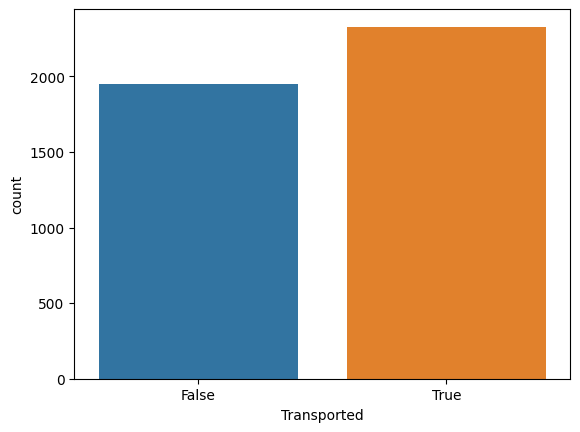

In [ ]:
# Convert yhat_test to a DataFrame
yhat_test_df = pd.DataFrame({'Transported': yhat_test})

# Create the count plot
sns.countplot(x='Transported', data=yhat_test_df)

# submit to kaggle

In [ ]:
submission.to_csv('kaggle_submission.csv', index=False)

In [ ]:
!kaggle competitions submit -c spaceship-titanic -m 'initial gb model' -f 'kaggle_submission.csv'

100% 56.2k/56.2k [00:00<00:00, 71.9kB/s]
Successfully submitted to Spaceship Titanic